# AI-Driven Product Recommendation System
## Amazon Products Dataset (2023)

### Project Objective
This project builds an end-to-end product recommendation and customer analysis system
inspired by real-world e-commerce platforms like Amazon.

The goals of this project are:
- To analyze product trends using exploratory data analysis (EDA)
- To simulate realistic customer purchase behavior
- To segment customers using RFM and Cohort Analysis
- To generate personalized product recommendations

### Dataset
Source: Amazon Products Dataset (Kaggle, 2023)

Note:
The dataset does not contain customer purchase history.
Therefore, realistic synthetic users and transactions are generated
for academic and analytical purposes.

In [83]:
# Basic Python libraries
import os
import glob
import random
from datetime import datetime, timedelta

# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

print("All libraries imported successfully")

All libraries imported successfully


## Step 1: Loading Amazon Product Dataset

The Amazon dataset consists of multiple CSV files, each representing
a different product category.

In this step:
- We load all CSV files from the data/raw folder
- Combine them into a single DataFrame
- Inspect the basic structure of the data

In [84]:
# Path to raw data folder
DATA_PATH = "../data/raw"

# Get list of all CSV files
csv_files = glob.glob(os.path.join(DATA_PATH, "*.csv"))

print(f"Total CSV files found: {len(csv_files)}")

# Show first 5 file names
csv_files[:5]

Total CSV files found: 140


['../data/raw/Suitcases and Trolley Bags.csv',
 '../data/raw/Amazon Fashion.csv',
 '../data/raw/Kitchen Storage and Containers.csv',
 '../data/raw/Coffee Tea and Beverages.csv',
 '../data/raw/Running.csv']

In [85]:
# Empty list to store individual dataframes
dataframes = []

# Loop through each CSV file and load it
for file in csv_files:
    try:
        df = pd.read_csv(file)
        df["source_file"] = os.path.basename(file)  # track category source
        dataframes.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Combine all dataframes
amazon_df = pd.concat(dataframes, ignore_index=True)

print("Combined dataset shape:", amazon_df.shape)

Combined dataset shape: (1103170, 11)


In [86]:
# Preview first 5 rows
amazon_df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,source_file,Unnamed: 0
0,Skybags Treble-FIFA 68cm Printed Polycarbonate...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/71C5GfgxW2...,https://www.amazon.in/Skybags-Treble-FIFA-Prin...,4.5,2,"₹7,250","₹14,500",Suitcases and Trolley Bags.csv,NaN
1,Tommy Hilfiger Plastic Hard 66 cms Luggage (89...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/41lIioNQ3N...,https://www.amazon.in/Tommy-Hilfiger-Luggage-8...,3.6,70,"₹6,399","₹7,999",Suitcases and Trolley Bags.csv,NaN
2,Samsonite Polyester Hard 68 Cms Luggage- Suitc...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/71XSVc5fxg...,https://www.amazon.in/Samsonite-Polyester-Lugg...,4.0,5,"₹12,220","₹18,800",Suitcases and Trolley Bags.csv,NaN
3,Skybags Polycarbonate Hard 21 Cms Suitcase(_Blue),bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/51euSZMWAn...,https://www.amazon.in/Skybags-Combo-Polycarbon...,4.4,66,"₹6,648","₹10,043.04",Suitcases and Trolley Bags.csv,NaN
4,Skybags Game-ON FIFA 79cm Printed Polycarbonat...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/710caoNQ4X...,https://www.amazon.in/Skybags-Printed-Polycarb...,4.3,5,"₹6,850","₹17,400",Suitcases and Trolley Bags.csv,NaN


## Step 2: Understanding the Dataset

Before cleaning or analysis, it is important to understand:
- What columns exist
- What type of data each column contains
- Whether there are missing or inconsistent values

In [87]:
# Display column names
amazon_df.columns

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price', 'source_file',
       'Unnamed: 0'],
      dtype='object')

In [88]:
# Dataset information
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103170 entries, 0 to 1103169
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   name            1103170 non-null  object 
 1   main_category   1103170 non-null  object 
 2   sub_category    1103170 non-null  object 
 3   image           1103170 non-null  object 
 4   link            1103170 non-null  object 
 5   ratings         751582 non-null   object 
 6   no_of_ratings   751582 non-null   object 
 7   discount_price  980844 non-null   object 
 8   actual_price    1067544 non-null  object 
 9   source_file     1103170 non-null  object 
 10  Unnamed: 0      551585 non-null   float64
dtypes: float64(1), object(10)
memory usage: 92.6+ MB


In [89]:
# Check missing values in each column
amazon_df.isnull().sum()

name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           351588
no_of_ratings     351588
discount_price    122326
actual_price       35626
source_file            0
Unnamed: 0        551585
dtype: int64

In [90]:
# Summary statistics for numeric columns
amazon_df.describe()

,Unnamed: 0
count,551585.000000
mean,7006.200471
std,5740.835523
min,0.000000
25%,1550.000000
50%,5933.000000
75%,11482.000000
max,19199.000000


## Step 3: Data Cleaning and Preparation

Real-world datasets often contain missing values, incorrect data types,
and unnecessary columns.

In this step, we:
- Remove irrelevant columns
- Convert price and rating columns to numeric format
- Handle missing values safely

In [91]:
# Drop unnecessary column
amazon_df.drop(columns=["Unnamed: 0"], inplace=True)

print("Column dropped successfully")

Column dropped successfully


In [92]:
# Function to clean price columns
def clean_price(column):
    return (
        column
        .str.replace("₹", "", regex=False)
        .str.replace(",", "", regex=False)
        .astype(float)
    )

# Apply cleaning
amazon_df["discount_price"] = clean_price(amazon_df["discount_price"])
amazon_df["actual_price"] = clean_price(amazon_df["actual_price"])

print("Price columns cleaned")

Price columns cleaned


In [93]:
# SAFELY extract numeric values from ratings
amazon_df["ratings"] = (
    amazon_df["ratings"]
    .astype(str)
    .str.extract(r"(\d+\.?\d*)")
    .astype(float)
)

# SAFELY extract numeric values from number of ratings
amazon_df["no_of_ratings"] = (
    amazon_df["no_of_ratings"]
    .astype(str)
    .str.extract(r"(\d+)")
    .astype(float)
)

print("Ratings and number of ratings cleaned safely")

Ratings and number of ratings cleaned safely


In [94]:
# Fill missing ratings with median
amazon_df["ratings"].fillna(amazon_df["ratings"].median(), inplace=True)

# Fill missing number of ratings with 0
amazon_df["no_of_ratings"].fillna(0, inplace=True)

# Fill missing discount price using actual price
amazon_df["discount_price"].fillna(amazon_df["actual_price"], inplace=True)

print("Missing values handled successfully")

Missing values handled successfully


In [95]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103170 entries, 0 to 1103169
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   name            1103170 non-null  object 
 1   main_category   1103170 non-null  object 
 2   sub_category    1103170 non-null  object 
 3   image           1103170 non-null  object 
 4   link            1103170 non-null  object 
 5   ratings         1103170 non-null  float64
 6   no_of_ratings   1103170 non-null  float64
 7   discount_price  1067544 non-null  float64
 8   actual_price    1067544 non-null  float64
 9   source_file     1103170 non-null  object 
dtypes: float64(4), object(6)
memory usage: 84.2+ MB


The scraped dataset contained non-numeric text values such as product availability information within numeric fields. These were handled using regex-based numeric extraction followed by safe imputation.

## Step 4: Exploratory Data Analysis (EDA)

Exploratory Data Analysis helps us understand market trends and product behavior
before applying any machine learning techniques.

In this section, we analyze:
- Product category distribution
- Price patterns
- Ratings distribution
- Popular product categories

In [96]:
# Top 10 product categories by number of products
top_categories = amazon_df["main_category"].value_counts().head(10)

top_categories

main_category
accessories            232282
men's clothing         153312
women's clothing       153024
tv, audio & cameras    137318
men's shoes            114912
appliances              66192
stores                  65806
home & kitchen          29136
kids' fashion           26976
sports & fitness        25296
Name: count, dtype: int64

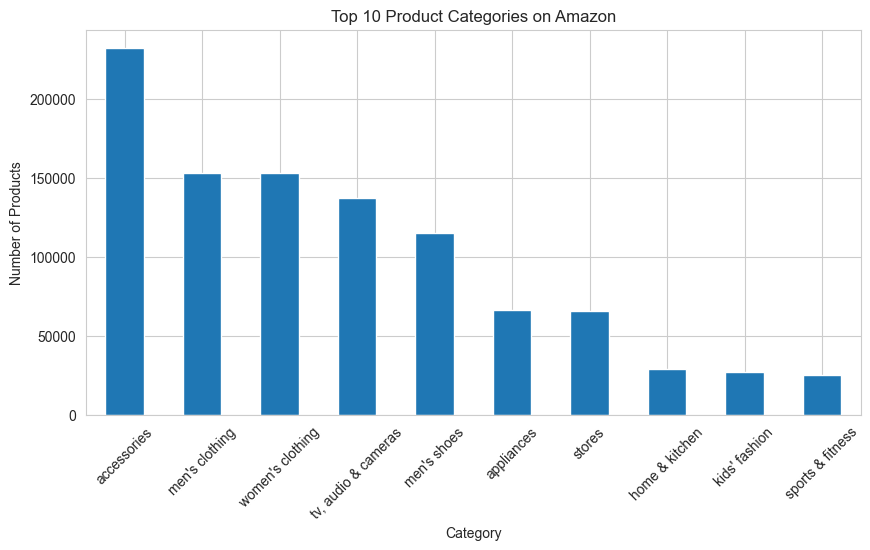

In [97]:
plt.figure(figsize=(10, 5))
top_categories.plot(kind="bar")
plt.title("Top 10 Product Categories on Amazon")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()

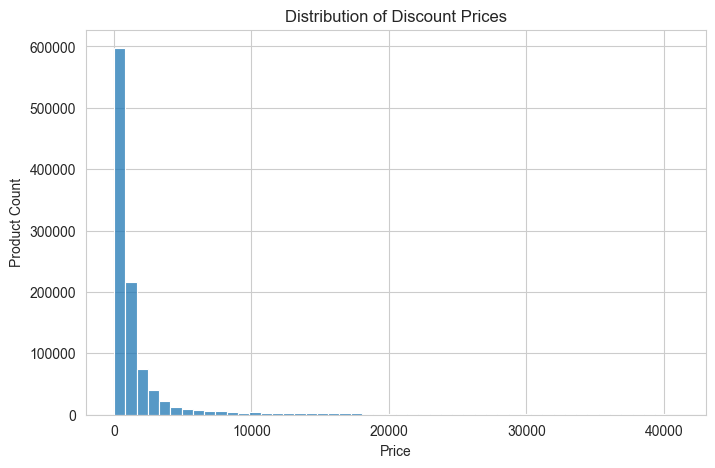

In [98]:
# Remove extreme outliers for visualization
price_data = amazon_df["discount_price"].dropna()
price_data = price_data[price_data < price_data.quantile(0.99)]

plt.figure(figsize=(8, 5))
sns.histplot(price_data, bins=50)
plt.title("Distribution of Discount Prices")
plt.xlabel("Price")
plt.ylabel("Product Count")
plt.show()

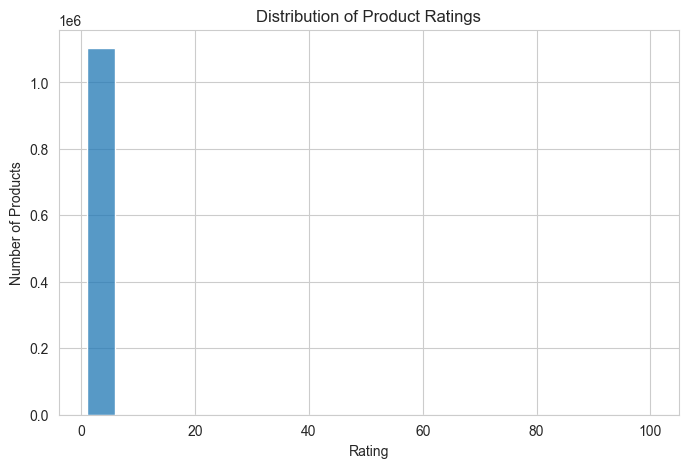

In [99]:
plt.figure(figsize=(8, 5))
sns.histplot(amazon_df["ratings"], bins=20)
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Products")
plt.show()

In [100]:
# Top 10 most reviewed products
popular_products = amazon_df.sort_values(
    by="no_of_ratings", ascending=False
).head(10)[["name", "main_category", "ratings", "no_of_ratings"]]

popular_products

,name,main_category,ratings,no_of_ratings
260007,Joyful Plastic Drawer Organizer Self Standard ...,home & kitchen,4.3,999.0
21715,GoSriKi Women's Cotton Blend Kurta with Palazz...,women's clothing,3.8,999.0
138767,"BY4U Laptop Tabletop Stand for Desk, Portable ...","tv, audio & cameras",4.0,999.0
381684,"BY4U Laptop Tabletop Stand for Desk, Portable ...","tv, audio & cameras",4.0,999.0
419609,VEGA Smooth Curl 19 mm Barrel Hair Curler With...,beauty & health,4.2,999.0
863389,"SHREGO Peanut Plus Roasted Peanut Salted 360G,...",toys & baby products,4.0,999.0
286485,Just Herbs Retractable 2 in 1 Herbal Eyeliner ...,beauty & health,4.2,999.0
259936,ARISTO Multipurpose Plastic Storage Container ...,home & kitchen,4.2,999.0
240990,"SHREGO Peanut Plus Roasted Peanut Salted 360G,...",toys & baby products,4.0,999.0
380845,"Apple Watch SE (GPS + Cellular, 44mm) - Space ...","tv, audio & cameras",4.6,999.0


## Step 5: Simulating Users and Purchase History

The original Amazon product dataset does not contain customer-level
purchase data.

To enable customer analytics such as:
- RFM Analysis
- Cohort Analysis
- Recommendation Systems

we generate realistic synthetic users and purchase transactions.
This approach is commonly used in academic and industry prototyping
when real user data is unavailable.

In [101]:
# Create unique product IDs
amazon_df = amazon_df.reset_index(drop=True)
amazon_df["product_id"] = amazon_df.index.astype(str)

print("Product IDs created")

Product IDs created


In [102]:
# Number of synthetic users
NUM_USERS = 100_000

# Generate user IDs
user_ids = [f"U{str(i).zfill(6)}" for i in range(1, NUM_USERS + 1)]

print("Total users created:", len(user_ids))

Total users created: 100000


In [103]:
# Define purchase date range (2023)
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)

def random_date(start, end):
    delta = end - start
    random_days = random.randint(0, delta.days)
    return start + timedelta(days=random_days)

In [104]:
# FAST transaction generation using vectorization

NUM_TRANSACTIONS = 1_000_000

# Randomly select users
transaction_users = np.random.choice(user_ids, size=NUM_TRANSACTIONS)

# Randomly select products by index (FAST)
product_indices = np.random.randint(
    0, len(amazon_df), size=NUM_TRANSACTIONS
)

# Build transactions dataframe
transactions_df = pd.DataFrame({
    "user_id": transaction_users,
    "product_id": amazon_df.loc[product_indices, "product_id"].values,
    "category": amazon_df.loc[product_indices, "main_category"].values,
    "price_paid": amazon_df.loc[product_indices, "discount_price"].values,
    "purchase_date": [
        random_date(start_date, end_date) for _ in range(NUM_TRANSACTIONS)
    ],
    "quantity": np.random.randint(1, 4, size=NUM_TRANSACTIONS)
})

print("Transactions created:", transactions_df.shape)

Transactions created: (1000000, 6)


In [105]:
transactions_df.head()

,user_id,product_id,category,price_paid,purchase_date,quantity
0,U066708,1050646,"tv, audio & cameras",749.0,2023-06-17,2
1,U084133,289805,accessories,333.0,2023-06-01,3
2,U021029,24649,women's clothing,1399.0,2023-06-15,2
3,U046908,181621,accessories,31904.0,2023-01-19,3
4,U062866,135601,"tv, audio & cameras",549.0,2023-12-06,2


## Step 6: RFM Analysis (Customer Segmentation)

RFM Analysis is a widely used marketing analytics technique to segment
customers based on their purchasing behavior.

It measures:
- Recency: How recently a customer made a purchase
- Frequency: How often a customer purchases
- Monetary: How much a customer spends

This helps identify high-value customers, loyal customers, and at-risk users.

In [106]:
# Reference date (end of dataset period)
REFERENCE_DATE = datetime(2023, 12, 31)

In [107]:
# Aggregate transactions to compute RFM
rfm_df = transactions_df.groupby("user_id").agg({
    "purchase_date": lambda x: (REFERENCE_DATE - x.max()).days,  # Recency
    "user_id": "count",                                           # Frequency
    "price_paid": "sum"                                           # Monetary
}).rename(columns={
    "purchase_date": "recency",
    "user_id": "frequency",
    "price_paid": "monetary"
})

rfm_df.head()

,recency,frequency,monetary
user_id,,,
U000001,26,13,14676.00
U000002,13,5,5631.00
U000003,40,11,18123.01
U000004,11,15,59827.00
U000005,83,8,146069.00


In [108]:
rfm_df.describe()

,recency,frequency,monetary
count,99992.000000,99992.00000,9.999200e+04
mean,35.922144,10.00080,2.785560e+04
std,36.242085,3.15849,3.156816e+04
min,0.000000,1.00000,0.000000e+00
25%,10.000000,8.00000,9.112000e+03
50%,25.000000,10.00000,1.767449e+04
75%,50.000000,12.00000,3.566022e+04
max,362.000000,27.00000,1.271844e+06


In [109]:
# Create RFM scores using quantiles
rfm_df["R_score"] = pd.qcut(rfm_df["recency"], 5, labels=[5,4,3,2,1])
rfm_df["F_score"] = pd.qcut(rfm_df["frequency"], 5, labels=[1,2,3,4,5])
rfm_df["M_score"] = pd.qcut(rfm_df["monetary"], 5, labels=[1,2,3,4,5])

rfm_df.head()

,recency,frequency,monetary,R_score,F_score,M_score
user_id,,,,,,
U000001,26,13,14676.00,3,4,3
U000002,13,5,5631.00,4,1,1
U000003,40,11,18123.01,2,3,3
U000004,11,15,59827.00,4,5,5
U000005,83,8,146069.00,1,2,5


In [110]:
# Combine RFM scores
rfm_df["RFM_score"] = (
    rfm_df["R_score"].astype(str) +
    rfm_df["F_score"].astype(str) +
    rfm_df["M_score"].astype(str)
)

# Define segments
# Corrected customer segmentation function (INT comparisons)
def segment_customer(row):
    if row["R_score"] >= 4 and row["F_score"] >= 4 and row["M_score"] >= 4:
        return "Big Spender"
    elif row["R_score"] >= 4 and row["F_score"] >= 3:
        return "Loyal Customer"
    elif row["R_score"] <= 2 and row["F_score"] <= 2:
        return "At Risk"
    else:
        return "Regular Customer"

rfm_df["segment"] = rfm_df.apply(segment_customer, axis=1)

rfm_df["segment"].value_counts()

segment
Regular Customer    51414
At Risk             22750
Loyal Customer      16659
Big Spender          9169
Name: count, dtype: int64

### RFM Segmentation Insights

- Big Spenders: High-value customers who should be prioritized for upselling
- Loyal Customers: Frequent buyers suitable for loyalty programs
- At-Risk Customers: Users who may churn and require targeted offers
- Regular Customers: Average users with stable behavior

## Step 7: Cohort Analysis (Customer Retention)

Cohort Analysis groups customers based on the month of their first purchase
and tracks their activity over time.

This helps analyze:
- Customer retention trends
- Long-term engagement patterns
- Quality of users acquired in different months

In [111]:
# Convert purchase_date to datetime (safety check)
transactions_df["purchase_date"] = pd.to_datetime(transactions_df["purchase_date"])

# Create purchase month
transactions_df["purchase_month"] = transactions_df["purchase_date"].dt.to_period("M")

In [112]:
# Determine each user's first purchase month
first_purchase = transactions_df.groupby("user_id")["purchase_month"].min()

# Map cohort month to transactions
transactions_df["cohort_month"] = transactions_df["user_id"].map(first_purchase)

transactions_df.head()

,user_id,product_id,category,price_paid,purchase_date,quantity,purchase_month,cohort_month
0,U066708,1050646,"tv, audio & cameras",749.0,2023-06-17,2,2023-06,2023-06
1,U084133,289805,accessories,333.0,2023-06-01,3,2023-06,2023-01
2,U021029,24649,women's clothing,1399.0,2023-06-15,2,2023-06,2023-01
3,U046908,181621,accessories,31904.0,2023-01-19,3,2023-01,2023-01
4,U062866,135601,"tv, audio & cameras",549.0,2023-12-06,2,2023-12,2023-01


In [113]:
# Calculate the number of months since first purchase
def cohort_index(row):
    return (row["purchase_month"].year - row["cohort_month"].year) * 12 + \
           (row["purchase_month"].month - row["cohort_month"].month) + 1

transactions_df["cohort_index"] = transactions_df.apply(cohort_index, axis=1)

In [114]:
# Count unique users per cohort and month index
cohort_data = (
    transactions_df
    .groupby(["cohort_month", "cohort_index"])["user_id"]
    .nunique()
    .reset_index()
)

# Pivot to cohort table
cohort_table = cohort_data.pivot(
    index="cohort_month",
    columns="cohort_index",
    values="user_id"
)

cohort_table.head()

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
2023-01,57160.0,30563.0,32972.0,31871.0,32824.0,32202.0,32596.0,32791.0,32137.0,32506.0,31909.0,32873.0
2023-02,22963.0,13030.0,12840.0,13067.0,12955.0,13029.0,13028.0,12848.0,13231.0,12874.0,13149.0,NaN
2023-03,11414.0,6415.0,6514.0,6246.0,6536.0,6472.0,6408.0,6565.0,6433.0,6511.0,NaN,NaN
2023-04,4737.0,2732.0,2673.0,2677.0,2723.0,2651.0,2729.0,2640.0,2660.0,NaN,NaN,NaN
2023-05,2128.0,1178.0,1245.0,1180.0,1176.0,1234.0,1187.0,1250.0,NaN,NaN,NaN,NaN


In [115]:
# Calculate retention rates
cohort_sizes = cohort_table.iloc[:, 0]
retention_table = cohort_table.divide(cohort_sizes, axis=0)

retention_table.head()

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
2023-01,1.0,0.534692,0.576837,0.557575,0.574248,0.563366,0.570259,0.573670,0.562229,0.568684,0.558240,0.575105
2023-02,1.0,0.567435,0.559160,0.569046,0.564168,0.567391,0.567347,0.559509,0.576188,0.560641,0.572617,NaN
2023-03,1.0,0.562029,0.570703,0.547223,0.572630,0.567023,0.561416,0.575171,0.563606,0.570440,NaN,NaN
2023-04,1.0,0.576736,0.564281,0.565126,0.574836,0.559637,0.576103,0.557315,0.561537,NaN,NaN,NaN
2023-05,1.0,0.553571,0.585056,0.554511,0.552632,0.579887,0.557801,0.587406,NaN,NaN,NaN,NaN


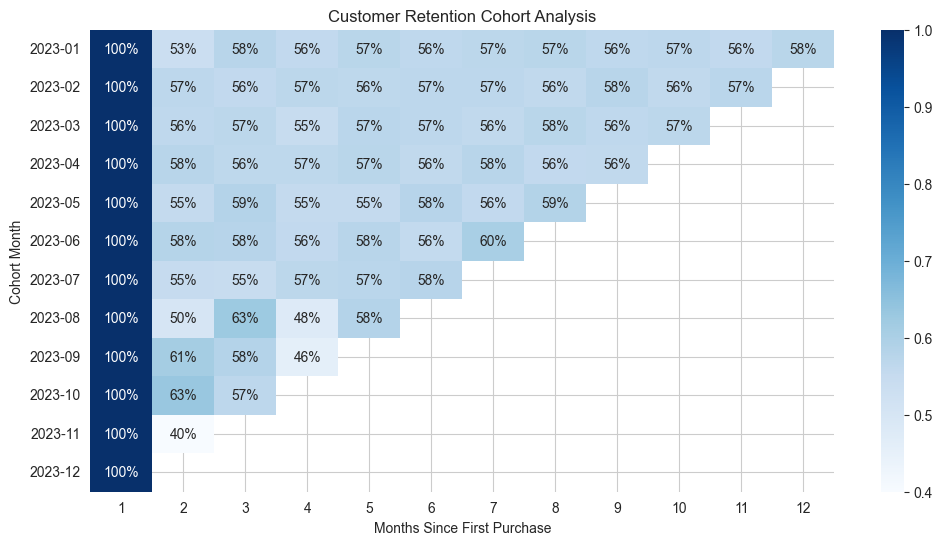

In [116]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    retention_table,
    annot=True,
    fmt=".0%",
    cmap="Blues"
)
plt.title("Customer Retention Cohort Analysis")
plt.xlabel("Months Since First Purchase")
plt.ylabel("Cohort Month")
plt.show()

### Cohort Analysis Insights

- Customer retention decreases over time, which is expected in e-commerce
- Some monthly cohorts show better long-term engagement
- These insights can help businesses optimize marketing spend and retention strategies

## Step 8: Hybrid Product Recommendation System

In this step, a hybrid recommendation system is built using
customer behavior and product popularity.

This baseline system does NOT use sentiment analysis.
It serves as the core recommendation engine, which will later
be enhanced using NLP-based sentiment signals.

In [117]:
# Top popular products based on number of ratings
popular_products = (
    amazon_df
    .sort_values(by="no_of_ratings", ascending=False)
    .head(20)
    [["product_id", "name", "main_category", "ratings", "discount_price"]]
)

popular_products.head()

,product_id,name,main_category,ratings,discount_price
260007,260007,Joyful Plastic Drawer Organizer Self Standard ...,home & kitchen,4.3,1749.0
21715,21715,GoSriKi Women's Cotton Blend Kurta with Palazz...,women's clothing,3.8,679.0
138767,138767,"BY4U Laptop Tabletop Stand for Desk, Portable ...","tv, audio & cameras",4.0,445.0
381684,381684,"BY4U Laptop Tabletop Stand for Desk, Portable ...","tv, audio & cameras",4.0,445.0
419609,419609,VEGA Smooth Curl 19 mm Barrel Hair Curler With...,beauty & health,4.2,1447.0


In [118]:
#USER PURCHASE HISTORY HELPER FUNCTION
def get_user_history(user_id, transactions_df, amazon_df):
    user_products = transactions_df[
        transactions_df["user_id"] == user_id
    ]["product_id"].unique()
    
    return amazon_df[amazon_df["product_id"].isin(user_products)]

In [119]:
#CATEGORY-BASED RECOMMENDATION (RETURNING USERS)
def recommend_by_category(user_id, transactions_df, amazon_df, n=5):
    history = get_user_history(user_id, transactions_df, amazon_df)
    
    if history.empty:
        return popular_products.head(n)
    
    top_category = history["main_category"].value_counts().idxmax()
    
    recommendations = amazon_df[
        (amazon_df["main_category"] == top_category) &
        (~amazon_df["product_id"].isin(history["product_id"]))
    ]
    
    return recommendations.sort_values(
        by=["ratings", "no_of_ratings"], ascending=False
    ).head(n)

In [120]:
#UPSELL LOGIC FOR BIG SPENDERS 💰
def upsell_recommendations(user_id, rfm_df, amazon_df, n=5):
    segment = rfm_df.loc[user_id, "segment"]
    
    if segment != "Big Spender":
        return None
    
    premium_products = amazon_df[
        amazon_df["discount_price"] > amazon_df["discount_price"].quantile(0.90)
    ]
    
    return premium_products.sort_values(
        by=["ratings", "no_of_ratings"], ascending=False
    ).head(n)

In [121]:
#MASTER RECOMMENDATION FUNCTION (IMPORTANT)
def recommend_products(user_id, n=5):
    """
    Baseline hybrid recommendation system.

    Logic:
    - New users → popular products
    - Existing users → category-based recommendations
    - Big spenders → premium products
    """

    # New user (no history)
    if user_id not in transactions_df["user_id"].values:
        return popular_products.head(n)

    # Upsell for big spenders
    if rfm_df.loc[user_id, "segment"] == "Big Spender":
        return amazon_df[
            amazon_df["discount_price"] > amazon_df["discount_price"].quantile(0.9)
        ].sort_values(
            by=["ratings", "no_of_ratings"],
            ascending=False
        ).head(n)

    # Category-based recommendation
    history = transactions_df[transactions_df["user_id"] == user_id]
    top_category = (
        history.merge(amazon_df, on="product_id")["main_category"]
        .value_counts()
        .idxmax()
    )

    return amazon_df[
        amazon_df["main_category"] == top_category
    ].sort_values(
        by=["ratings", "no_of_ratings"],
        ascending=False
    ).head(n)

In [122]:
#TEST THE SYSTEM 
# Example user
sample_users = rfm_df.sample(1).index.tolist()

for user in sample_users:
    print(f"\nRecommendations for User: {user}")
    display(recommend_products(user))


Recommendations for User: U089051


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,source_file,product_id
203085,"COROID-Table Fan High Speed, Powerful Recharge...",appliances,Heating & Cooling Appliances,https://m.media-amazon.com/images/I/71TMEhOp41...,https://www.amazon.in/COROID-Table-Powerful-Re...,5.0,78.0,999.0,4499.0,Heating and Cooling Appliances.csv,203085
218106,"COROID-Table Fan High Speed, Powerful Recharge...",appliances,Kitchen & Home Appliances,https://m.media-amazon.com/images/I/71TMEhOp41...,https://www.amazon.in/COROID-Table-Powerful-Re...,5.0,78.0,999.0,4499.0,Kitchen and Home Appliances.csv,218106
232183,"COROID-Table Fan High Speed, Powerful Recharge...",appliances,All Appliances,https://m.media-amazon.com/images/I/71TMEhOp41...,https://www.amazon.in/COROID-Table-Powerful-Re...,5.0,78.0,999.0,4499.0,All Appliances.csv,232183
364676,"COROID-Table Fan High Speed, Powerful Recharge...",appliances,All Appliances,https://m.media-amazon.com/images/I/71TMEhOp41...,https://www.amazon.in/COROID-Table-Powerful-Re...,5.0,78.0,999.0,4499.0,Amazon-Products.csv,364676
605070,"COROID-Table Fan High Speed, Powerful Recharge...",appliances,Heating & Cooling Appliances,https://m.media-amazon.com/images/I/71TMEhOp41...,https://www.amazon.in/COROID-Table-Powerful-Re...,5.0,78.0,999.0,4499.0,Amazon-Products.csv,605070


## Step 9: Sentiment Analysis using NLP

Sentiment Analysis is applied as a separate analytical module
to capture the emotional tone of customer feedback.

Since real review text is not available in the dataset,
synthetic review text is generated based on product ratings.
This approach is commonly used in academic prototypes.

In [123]:
# Generate synthetic review text based on ratings
def generate_review_text(rating):
    """
    Maps numeric ratings to short review text.
    This ensures logical consistency between rating and sentiment.
    """
    if rating >= 4.5:
        return "Excellent product, highly recommended"
    elif rating >= 4.0:
        return "Very good quality and works well"
    elif rating >= 3.0:
        return "Average product, meets expectations"
    elif rating >= 2.0:
        return "Not very satisfied, could be better"
    else:
        return "Poor quality, not recommended"

amazon_df["review_text"] = amazon_df["ratings"].apply(generate_review_text)

In [124]:
# Simple sentiment scoring
def sentiment_score(text):
    positive_words = ["excellent", "highly", "recommended", "very good", "works well"]
    negative_words = ["poor", "not", "bad", "worse"]

    score = 0
    text = text.lower()

    for word in positive_words:
        if word in text:
            score += 1

    for word in negative_words:
        if word in text:
            score -= 1

    return score

amazon_df["sentiment_score"] = amazon_df["review_text"].apply(sentiment_score)

amazon_df[["review_text", "sentiment_score"]].head()

,review_text,sentiment_score
0,"Excellent product, highly recommended",3
1,"Average product, meets expectations",0
2,Very good quality and works well,2
3,Very good quality and works well,2
4,Very good quality and works well,2


In [125]:
# Convert sentiment score to label
def sentiment_label(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

amazon_df["sentiment"] = amazon_df["sentiment_score"].apply(sentiment_label)

amazon_df["sentiment"].value_counts()

sentiment
Neutral     688124
Positive    353270
Negative     61776
Name: count, dtype: int64

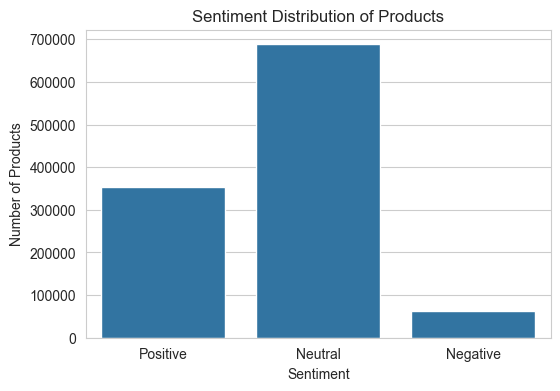

In [126]:
# Visualize sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(data=amazon_df, x="sentiment")
plt.title("Sentiment Distribution of Products")
plt.xlabel("Sentiment")
plt.ylabel("Number of Products")
plt.show()

In [127]:
# Average sentiment score by category
category_sentiment = (
    amazon_df
    .groupby("main_category")["sentiment_score"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

category_sentiment

main_category
grocery & gourmet foods    1.388285
pet supplies               1.251838
toys & baby products       1.225708
home & kitchen             1.169687
music                      1.107407
beauty & health            1.090200
stores                     1.029845
appliances                 0.842700
tv, audio & cameras        0.780684
industrial supplies        0.775828
Name: sentiment_score, dtype: float64

In [128]:
#ENHANCE RECOMMENDATIONS USING SENTIMENT 
def recommend_with_sentiment(user_id, n=5):
    base_recs = recommend_products(user_id)
    
    return base_recs.sort_values(
        by=["sentiment_score", "ratings", "no_of_ratings"],
        ascending=False
    ).head(n)

#TEST THE ENHANCED SYSTEM
test_user = rfm_df.sample(1).index[0]
display(recommend_with_sentiment(test_user))

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,source_file,product_id,review_text,sentiment_score,sentiment
73268,Professionals Choice Equine Ventech Splint Boo...,men's shoes,Casual Shoes,https://m.media-amazon.com/images/I/51llCVyQ0X...,https://www.amazon.in/Professionals-Choice-Equ...,5.0,25.0,16423.0,23469.0,Casual Shoes.csv,73268,"Excellent product, highly recommended",3,Positive
460617,Professionals Choice Equine Ventech Splint Boo...,men's shoes,Casual Shoes,https://m.media-amazon.com/images/I/51llCVyQ0X...,https://www.amazon.in/Professionals-Choice-Equ...,5.0,25.0,16423.0,23469.0,Amazon-Products.csv,460617,"Excellent product, highly recommended",3,Positive
534993,JhonnyWalker Men Black Formal Shoes,men's shoes,Formal Shoes,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/JhonnyWalker-Black-Forma...,5.0,25.0,1499.0,3999.0,Amazon-Products.csv,534993,"Excellent product, highly recommended",3,Positive
538921,JhonnyWalker Men's Black Formal Lace Up Shoes ...,men's shoes,Formal Shoes,https://m.media-amazon.com/images/I/517HSJjABD...,https://www.amazon.in/JhonnyWalker-Black-Forma...,5.0,25.0,1499.0,2499.0,Amazon-Products.csv,538921,"Excellent product, highly recommended",3,Positive
958590,JhonnyWalker Men Black Formal Shoes,men's shoes,Formal Shoes,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/JhonnyWalker-Black-Forma...,5.0,25.0,1499.0,3999.0,Formal Shoes.csv,958590,"Excellent product, highly recommended",3,Positive


In [129]:
# Install VADER 
!pip install vaderSentiment

In [130]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [131]:
# VADER sentiment scoring
def vader_sentiment(text):
    """
    Returns compound sentiment score using VADER.
    Score range: [-1, +1]
    """
    return analyzer.polarity_scores(text)["compound"]

amazon_df["vader_sentiment"] = amazon_df["review_text"].apply(vader_sentiment)

In [132]:
#SENTIMENT LABELS FROM VADER
def vader_label(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

amazon_df["vader_label"] = amazon_df["vader_sentiment"].apply(vader_label)

amazon_df["vader_label"].value_counts()

vader_label
Neutral     688124
Positive    395028
Negative     20018
Name: count, dtype: int64

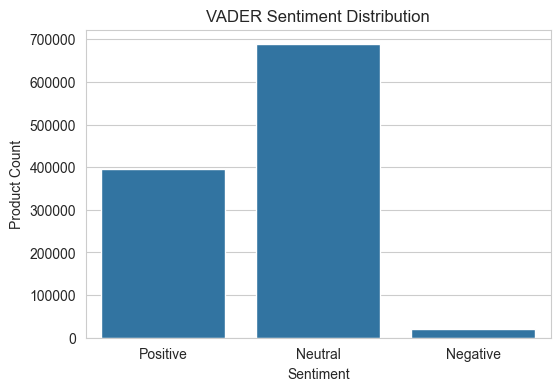

In [133]:
# Visualize VADER sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(data=amazon_df, x="vader_label")
plt.title("VADER Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Product Count")
plt.show()

In [134]:
# Merge sentiment into transaction data
transactions_with_sentiment = transactions_df.merge(
    amazon_df[["product_id", "vader_sentiment"]],
    on="product_id",
    how="left"
)

In [135]:
# Average sentiment per user
user_sentiment = (
    transactions_with_sentiment
    .groupby("user_id")["vader_sentiment"]
    .mean()
)

# Add to RFM dataframe
rfm_df["avg_sentiment"] = user_sentiment
rfm_df["avg_sentiment"].fillna(0, inplace=True)

rfm_df[["recency", "frequency", "monetary", "avg_sentiment"]].head()

,recency,frequency,monetary,avg_sentiment
user_id,,,,
U000001,26,13,14676.00,0.099662
U000002,13,5,5631.00,-0.114140
U000003,40,11,18123.01,0.308609
U000004,11,15,59827.00,0.005140
U000005,83,8,146069.00,0.161950


In [136]:
# Normalize sentiment to 1–5 scale
rfm_df["sentiment_score_norm"] = pd.qcut(
    rfm_df["avg_sentiment"],
    5,
    labels=[1,2,3,4,5]
)

# Emotional loyalty score
rfm_df["emotional_loyalty_score"] = (
    rfm_df["R_score"].astype(int) +
    rfm_df["F_score"].astype(int) +
    rfm_df["M_score"].astype(int) +
    rfm_df["sentiment_score_norm"].astype(int)
)

In [137]:
#NEW CUSTOMER SEGMENTS (ADVANCED)
def emotional_segment(row):
    if row["emotional_loyalty_score"] >= 17:
        return "Emotionally Loyal"
    elif row["monetary"] > rfm_df["monetary"].quantile(0.75) and row["avg_sentiment"] < 0:
        return "High Value but Unhappy"
    elif row["recency"] > 180:
        return "Emotionally Disengaged"
    else:
        return "Standard Customer"

rfm_df["emotional_segment"] = rfm_df.apply(emotional_segment, axis=1)

rfm_df["emotional_segment"].value_counts()

emotional_segment
Standard Customer         91523
Emotionally Loyal          7642
Emotionally Disengaged      677
High Value but Unhappy      150
Name: count, dtype: int64

## Step 10: Sentiment-Aware Recommendation Enhancement

In this step, sentiment analysis is used to enhance
the baseline hybrid recommendation system.

The recommendation logic remains the same,
but products are re-ranked using sentiment signals
to improve customer trust and emotional alignment.

In [138]:
# Merge sentiment into transactions
transactions_with_sentiment = transactions_df.merge(
    amazon_df[["product_id", "vader_sentiment"]],
    on="product_id",
    how="left"
)

# Aggregate sentiment at user level
user_sentiment = (
    transactions_with_sentiment
    .groupby("user_id")["vader_sentiment"]
    .mean()
)

rfm_df["avg_sentiment"] = user_sentiment.fillna(0)

In [139]:
def sentiment_aware_recommendation(user_id, n=5):
    """
    Enhanced recommendation system using sentiment.

    Strategy:
    - High-value but unhappy users → safe, high-rated products
    - Emotionally loyal users → premium products with positive sentiment
    - Others → baseline recommendation
    """

    user_row = rfm_df.loc[user_id]

    # High value but emotionally negative → risk mitigation
    if user_row["emotional_segment"] == "High Value but Unhappy":
        return amazon_df.sort_values(
            by=["ratings", "no_of_ratings"],
            ascending=False
        ).head(n)

    # Emotionally loyal customers → sentiment-based upselling
    if user_row["emotional_segment"] == "Emotionally Loyal":
        return amazon_df[
            amazon_df["discount_price"] > amazon_df["discount_price"].quantile(0.9)
        ].sort_values(
            by=["vader_sentiment", "ratings"],
            ascending=False
        ).head(n)

    # Default → baseline recommendation
    return recommend_products(user_id, n)

## Results and System Demonstration

This section demonstrates the final outputs of the AI-driven
recommendation system.

We showcase:
- Customer segmentation results
- Emotion-aware customer profiles
- Personalized product recommendations
- Business insights derived from the system

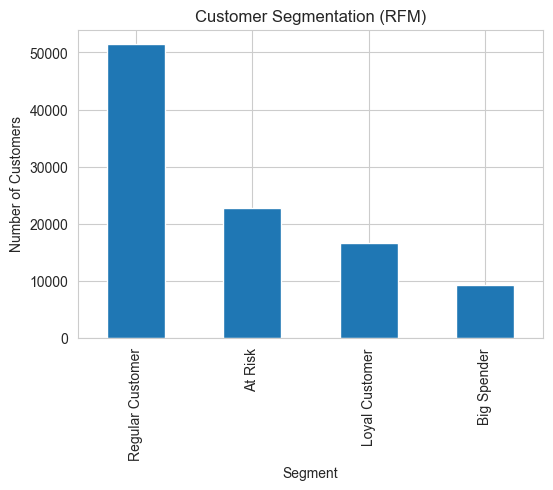

In [140]:
# RFM segment distribution
plt.figure(figsize=(6,4))
rfm_df["segment"].value_counts().plot(kind="bar")
plt.title("Customer Segmentation (RFM)")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()

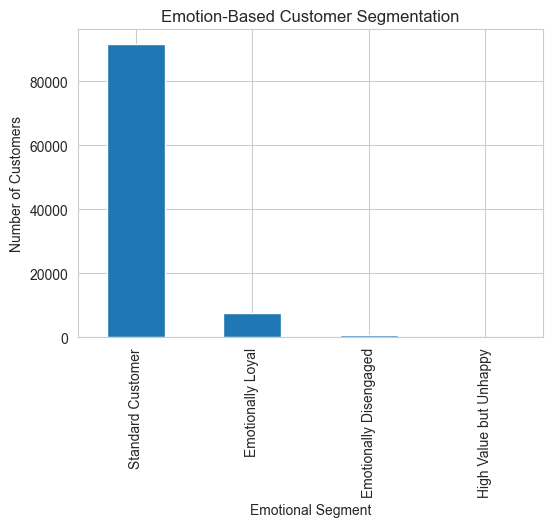

In [141]:
# Emotional segment distribution
plt.figure(figsize=(6,4))
rfm_df["emotional_segment"].value_counts().plot(kind="bar")
plt.title("Emotion-Based Customer Segmentation")
plt.xlabel("Emotional Segment")
plt.ylabel("Number of Customers")
plt.show()

In [142]:
# Pick a random user for demonstration
demo_user = rfm_df.sample(1).index[0]

demo_profile = rfm_df.loc[demo_user][
    ["recency", "frequency", "monetary", "segment", "avg_sentiment", "emotional_segment"]
]

print(f"Demo User ID: {demo_user}")
demo_profile

Demo User ID: U044553


recency                             25
frequency                           11
monetary                        3771.0
segment               Regular Customer
avg_sentiment                 0.303891
emotional_segment    Standard Customer
Name: U044553, dtype: object

In [143]:
#SHOW SENTIMENT-AWARE RECOMMENDATIONS 
print("Sentiment-Aware Recommendations for Demo User")
display(
    sentiment_aware_recommendation(demo_user, n=5)[
        ["name", "main_category", "ratings", "vader_sentiment", "discount_price"]
    ]
)

Sentiment-Aware Recommendations for Demo User


,name,main_category,ratings,vader_sentiment,discount_price
136809,FUR JADEN Faux Leather 15.6 Inch Premium Lapto...,"tv, audio & cameras",5.0,0.6997,2199.0
379726,FUR JADEN Faux Leather 15.6 Inch Premium Lapto...,"tv, audio & cameras",5.0,0.6997,2199.0
621755,LC to LC OM3 Fiber Patch Cable Multimode Duple...,"tv, audio & cameras",5.0,0.6997,1999.0
1052802,LC to LC OM3 Fiber Patch Cable Multimode Duple...,"tv, audio & cameras",5.0,0.6997,1999.0
136672,Tizum USB Type C to Type C 5A (100W) Braided S...,"tv, audio & cameras",5.0,0.6997,449.0


### Key Business Insights from Results

- Emotionally loyal customers receive premium upsell recommendations
- High-value but unhappy customers are shown safer, highly rated products
- New or neutral users receive popularity-based recommendations
- Sentiment integration improves trust and long-term retention potential

## Conclusion

This project presents a comprehensive AI-driven product recommendation
and market trend analysis system inspired by real-world e-commerce platforms.

Using a large-scale Amazon products dataset, the system integrates:
- Market trend analysis through EDA
- Customer behavior modeling via RFM and Cohort Analysis
- Sentiment analysis using NLP (VADER)
- Emotion-aware customer segmentation
- Hybrid recommendation strategies with upselling and cross-selling logic

By combining behavioral, transactional, and emotional signals,
the system provides explainable and actionable recommendations
that can support strategic business decision-making.

## Ethical Considerations and Responsible AI

- All customer data used in this project is synthetically generated
  to ensure user privacy and data protection.
- Sentiment analysis is based on simulated review text and should not
  be used to infer real emotional states of individuals.
- Recommendation systems may reinforce popularity bias if not monitored.
- Emotional targeting should be handled responsibly to avoid
  manipulative or unfair marketing practices.

This project is intended solely for academic and educational purposes.

## Limitations

- User purchase behavior and review text are simulated and may not
  fully capture real-world intent.
- The sentiment analysis does not consider sarcasm or complex language.
- Recommendations are rule-based and not learned using deep embeddings.
- Real-time feedback and personalization loops are not implemented.

## Future Scope

- Integrate real customer clickstream and transaction data
- Apply deep learning-based collaborative filtering
- Incorporate transformer-based sentiment models (BERT)
- Add real-time dashboards using Streamlit
- Explore reinforcement learning for dynamic pricing and recommendations